In [71]:
!apt-get update && apt-get install -y gh




Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 6,555 B in 1s (6,301 B/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... D

In [72]:
!gh repo create cardio_train --public

GraphQL: Name already exists on this account (createRepository)


In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import pandas as pd

df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3. cardio_train.csv", sep = ';')
df.shape

(70000, 13)

In [75]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [76]:
!git add "/content/drive/MyDrive/Colab Notebooks/cardio_train_Models.ipynb"

In [77]:
!git config --global user.name "Many el Cientifico"
!git config --global user.email "n.manuelcamacho@gmail.com"

In [78]:
!git commit -m "Agrega el notebook inicial con el modelo de entrenamiento"

[master 4409064] Agrega el notebook inicial con el modelo de entrenamiento
 1 file changed, 1 insertion(+), 1 deletion(-)


In [79]:
!git branch

* master


In [80]:
!git checkout master

M	drive/MyDrive/Colab Notebooks/cardio_train_Models.ipynb
Already on 'master'


In [81]:
!git push -u origin master

fatal: 'origin' does not appear to be a git repository
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


<div style="text-align:center; font-size:50px; font-weight:bold; margin-top:20px;">Limpieza de datos
</div>

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [29]:

df['age'] = (df['age'] / 365).astype(int)

df.drop('id', axis = 1, inplace = True)


print(df.head())

"""en el head anterior se observo que la columna age estaba en dias por lo cual se convirtio
a años, posterior se elimino la columna id ya que no aporta informacion relevante, y se uso la
funcion head Mostrar las primeras filas para verificar el cambio """

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   51       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   47       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  


'en el head anterior se observo que la columna age estaba en dias por lo cual se convirtio\na años, posterior se elimino la columna id ya que no aporta informacion relevante, y se uso la\nfuncion head Mostrar las primeras filas para verificar el cambio '

In [ ]:
df.shape

""" visualisamos la cantidad de filas y columnas del dataframe"""

(70000, 12)

In [ ]:
df.describe().T

""" visualisamos la estadistica descriptiva de las columnas del dataframe"""

count        mean         std    min    25%    50%    75%  \
age          70000.0   52.840671    6.766774   29.0   48.0   53.0   58.0   
gender       70000.0    1.349571    0.476838    1.0    1.0    1.0    2.0   
height       70000.0  164.359229    8.210126   55.0  159.0  165.0  170.0   
weight       70000.0   74.205690   14.395757   10.0   65.0   72.0   82.0   
ap_hi        70000.0  128.817286  154.011419 -150.0  120.0  120.0  140.0   
ap_lo        70000.0   96.630414  188.472530  -70.0   80.0   80.0   90.0   
cholesterol  70000.0    1.366871    0.680250    1.0    1.0    1.0    2.0   
gluc         70000.0    1.226457    0.572270    1.0    1.0    1.0    1.0   
smoke        70000.0    0.088129    0.283484    0.0    0.0    0.0    0.0   
alco         70000.0    0.053771    0.225568    0.0    0.0    0.0    0.0   
active       70000.0    0.803729    0.397179    0.0    1.0    1.0    1.0   
cardio       70000.0    0.499700    0.500003    0.0    0.0    0.0    1.0   

                 max  
age             64.0  
gender           2.0  
height         250.0  
weight         200.0  
ap_hi        16020.0  
ap_lo        11000.0  
cholesterol      3.0  
gluc             3.0  
smoke            1.0  
alco             1.0  
active           1.0  
cardio           1.0

- Generalmente en este tipo de datasets se utiliza como variable objetivo variables dicotomicas (0 para ausencia y 1 para presencia). Por lo tanto, la columna "cardio" es la variable objetivo en este contexto.


In [ ]:
df.info()
"""esta funcion de pandas nos permite ver la cantidad de datos no nulos y el tipo de dato que contiene cada
 columna, en este caso los Non-Null Count son iguales a la cantidad de filas por lo que no hay datos faltantes"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int32  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int32(1), int64(10)
memory usage: 6.1 MB


C:\Users\Manuel\AppData\Local\Temp\ipykernel_18808\1570918124.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Manuel\AppData\Local\Temp\ipykernel_18808\1570918124.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Manuel\AppData\Local\Temp\ipykern

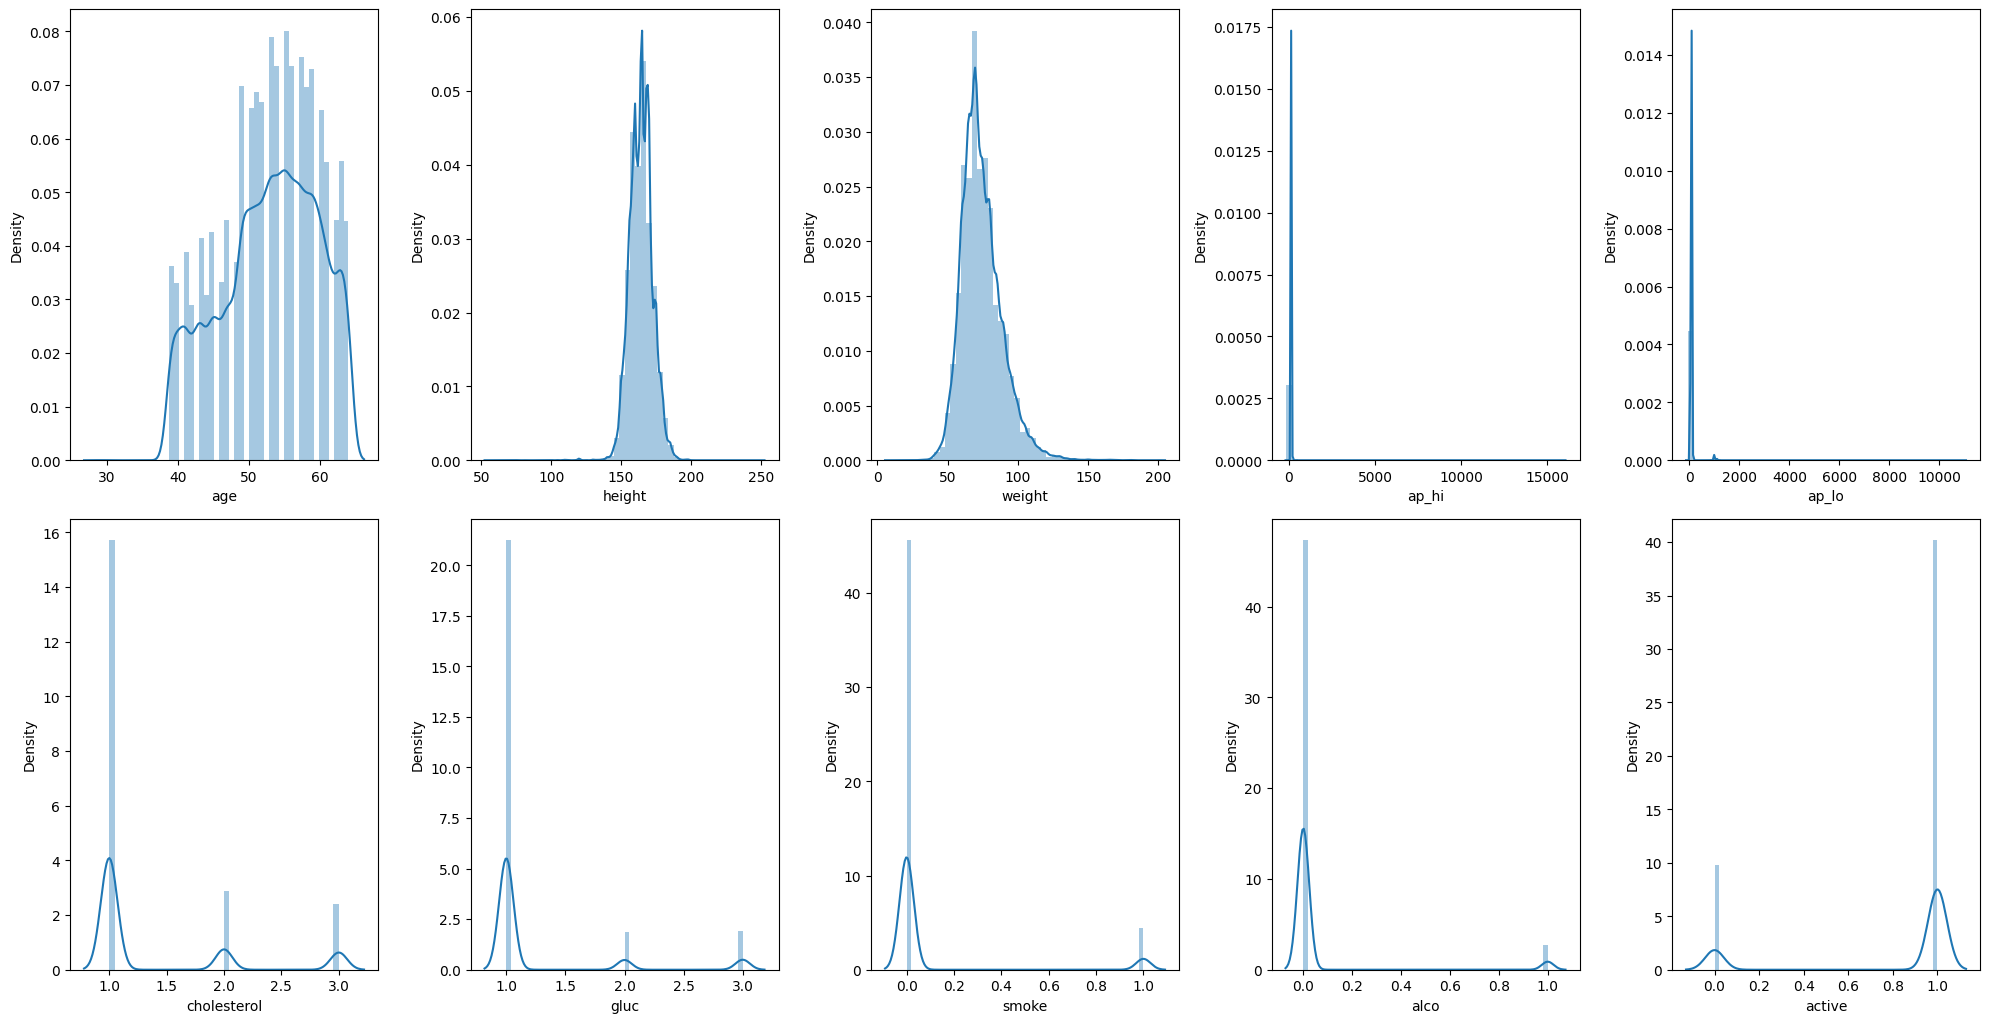

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_cols = [col for col in df.columns if col not in ['gender', 'cardio']]

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in filtered_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

""" se grafican las variables numericas mediante distplot, el cual incluye un histograma y una linea de densidad,
lo cual nos permite comparar la distribucion de diferentes conjuntos de datos al proporcionar una visualización continua."""



C:\Users\Manuel\AppData\Local\Temp\ipykernel_18808\3430830171.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='rocket')
C:\Users\Manuel\AppData\Local\Temp\ipykernel_18808\3430830171.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='rocket')


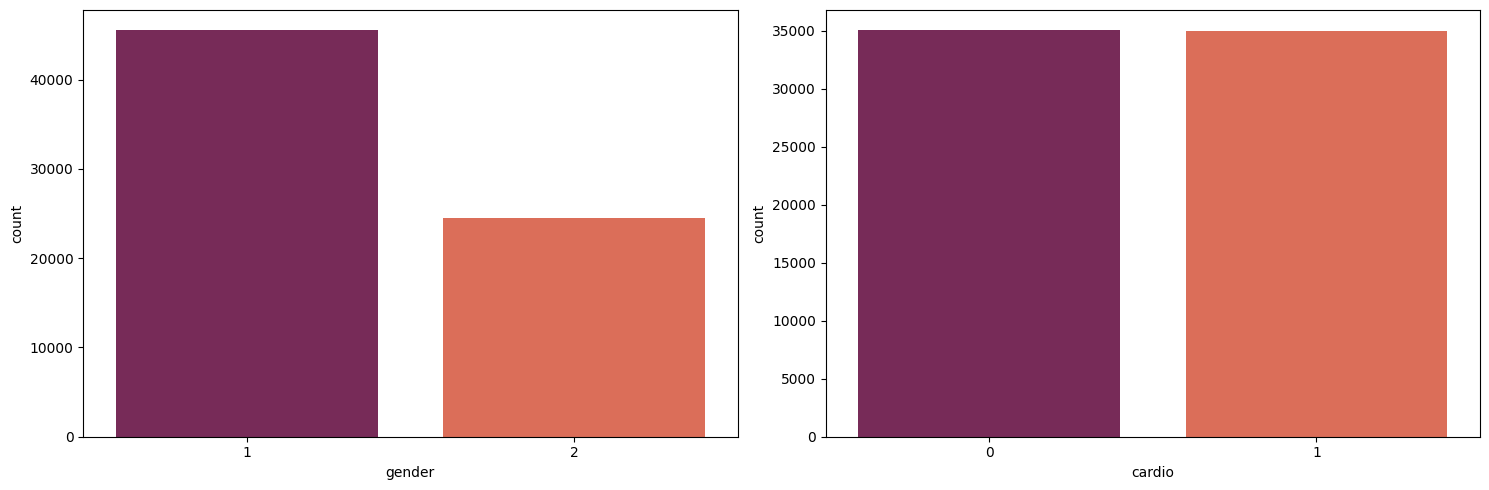

In [ ]:

plt.figure(figsize=(15, 5))
plotnumber = 1

for column in ['gender', 'cardio']:
    ax = plt.subplot(1, 2, plotnumber)
    sns.countplot(x=df[column], palette='rocket')
    plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

""" Graficamos las variables categoricas mediante countplot, el cual nos permite contar la cantidad de veces que se repite"""

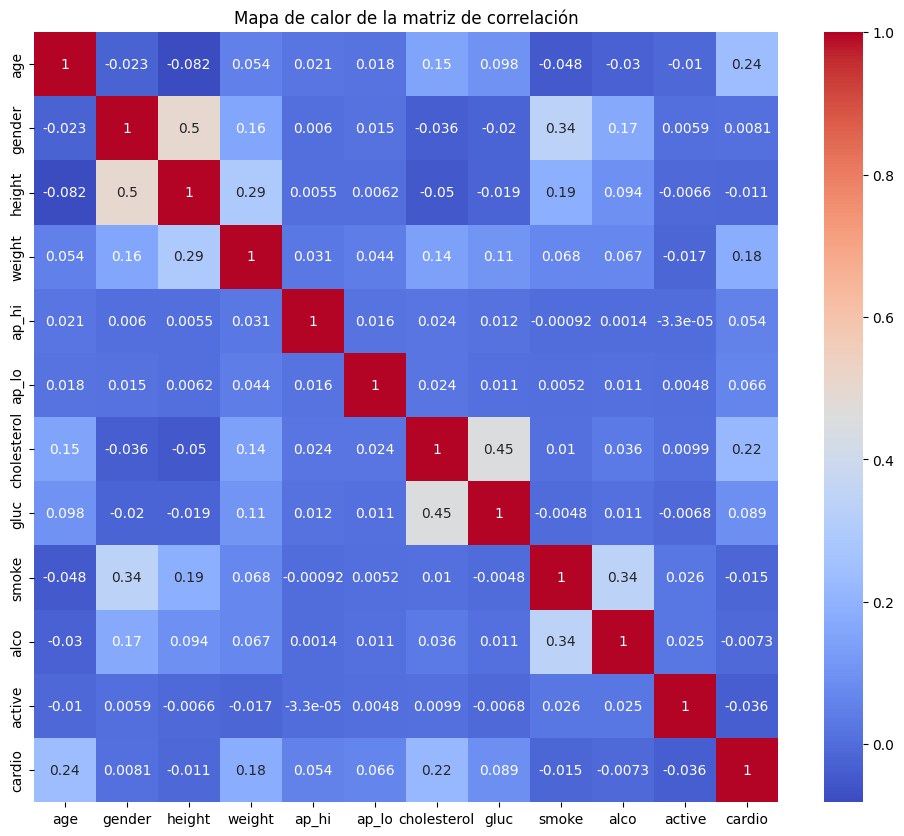

In [ ]:
corr_matrix = df.corr()  # Calculamos la matriz de correlación

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Mapa de calor de la matriz de correlación")
plt.show()

""" Graficamos la matriz de correlacion mediante un mapa de calor, el cual nos permite visualizar
 la relacion entre las variables"""

## Análisis de Correlaciones con la variable objetivo "Cardio"

A continuación se presentan algunas correlaciones identificadas entre ciertas variables y la condición "cardio":

- **Age (0.24)**  
    Existe una correlación positiva moderada entre la edad y la condición *cardio*. Esto sugiere que a mayor edad, hay una mayor probabilidad de presentar la condición.

- **ap_hi (0.054)**  
    La presión arterial sistólica presenta una correlación positiva débil con *cardio*, evidenciando una leve asociación entre presión arterial alta y la probabilidad de tener la condición.

- **Cholesterol (0.22)**  
    Se observa una correlación positiva moderada entre los niveles de colesterol y *cardio*. Niveles altos de colesterol pueden considerarse como un factor de riesgo para la condición.

- **Weight (0.18)**  
    La variable peso muestra una correlación positiva, lo que indica que un mayor peso se asocia con una mayor probabilidad de desarrollar *cardio*.

- **Gluc (0.089)**  
    Aunque la correlación es débil, se evidencia una relación positiva entre la glucosa y *cardio*, lo cual sugiere que niveles elevados de glucosa podrían estar vinculados con la condición.

In [ ]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

<div style="text-align:center; font-size:50px; font-weight:bold; margin-top:20px;">
Exploratory Data Analysis (EDA)
</div>

In [ ]:
import plotly.express as px
def violin(col):
    fig = px.violin(df, y=col, x="cardio", color="cardio", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="cardio", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="cardio", template = 'plotly_dark')
    return fig.show()

In [ ]:
violin('age')

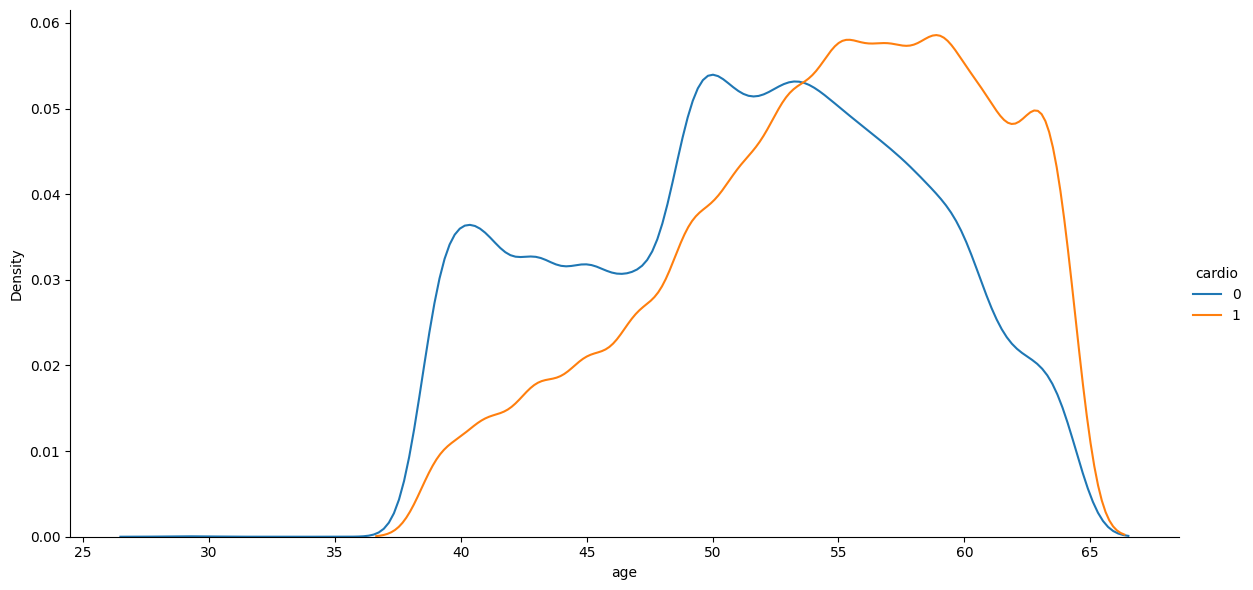

In [ ]:
kde('age')

In [ ]:
violin('ap_hi')

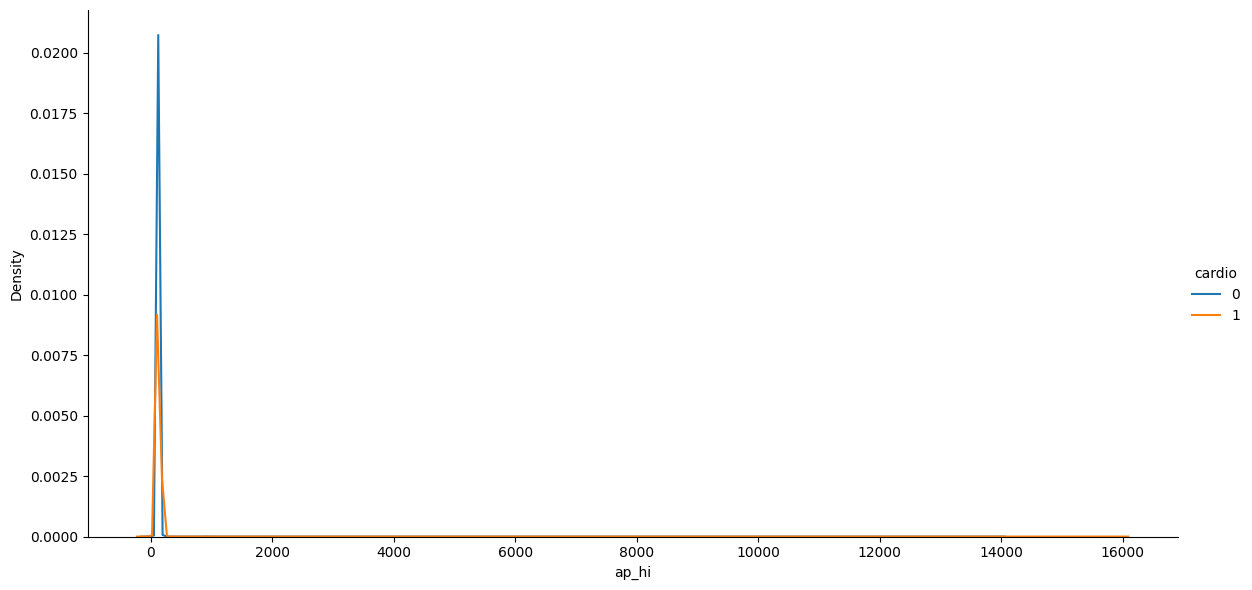

In [ ]:
kde('ap_hi')

In [ ]:
violin('cholesterol')

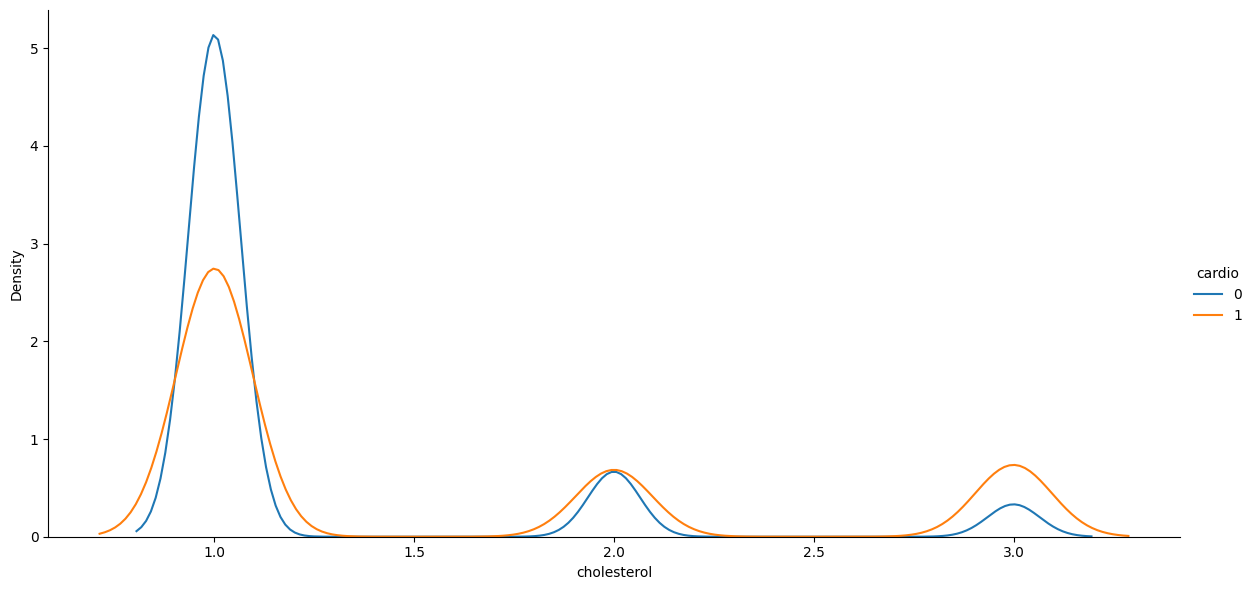

In [ ]:
kde('cholesterol')

In [ ]:
violin('weight')

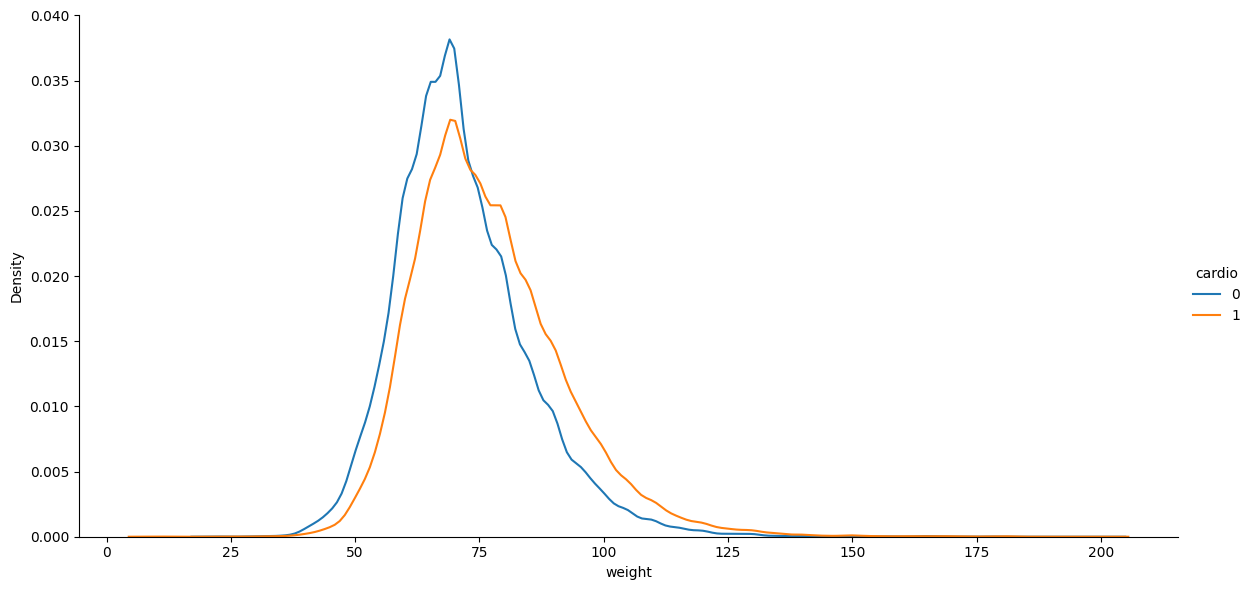

In [ ]:
kde('weight')

In [ ]:
violin('gluc')

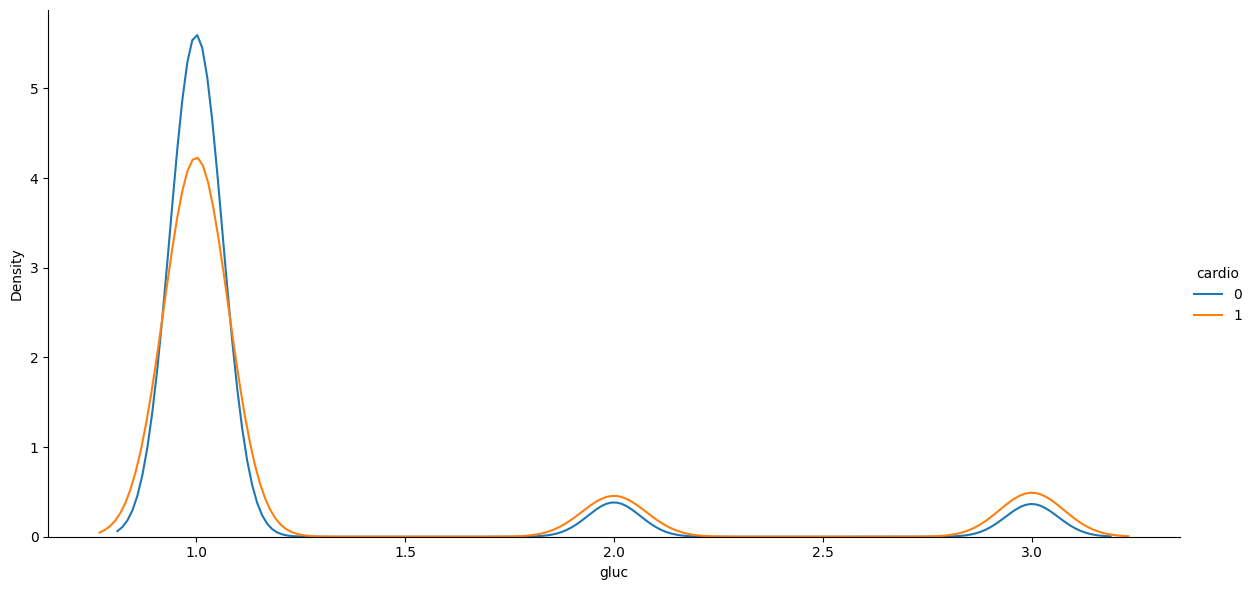

In [ ]:
kde('gluc')

In [ ]:
scatter('age', 'cardio')

In [ ]:
scatter('ap_hi', 'cardio')

In [ ]:
scatter('cholesterol', 'cardio')

In [ ]:
scatter('weight', 'cardio')

In [ ]:
scatter('gluc', 'cardio')

In [ ]:
px.bar(df, x="age", y="cardio", color='cardio', barmode='group', template = 'plotly_dark', height = 400)

# Análisis de Distribución y Riesgo Cardiovascular

 Las gráficas de violín evidencian  **variaciones en la distribución** de variables como la *edad*, la *presión arterial*, el *colesterol*. la *glucosa* y el *peso* pueden estar asociadas a un mayor riesgo de enfermedades cardiovasculares. La identificación de **valores extremos** o **concentraciones** en ciertos intervalos es clave para:

- **Predicción** de eventos cardiovasculares.
- **Manejo** y **estratificación** de pacientes.
- Mejor comprensión de los **factores de riesgo** involucrados.

> "La visualización de datos mediante gráficos de violín permite identificar patrones y diferencias en las distribuciones de variables fisiológicas. Estas diferencias pueden ser relevantes para la comprensión de factores de riesgo y la estratificación de pacientes en el contexto de las enfermedades cardiovasculares."  
>  
> — Rodríguez-Padial, L., & Ávila-Gandía, V. (2021). *Estadística para Ciencias de la Salud.* Paraninfo. ISBN: 9788428344825

Además, se ha observado que:
- **La edad** y el **peso** muestran tendencias que podrían facilitar el diagnóstico.
- Valores atípicos en **presión arterial**, **colesterol** y **glucosa** resaltan la necesidad de estudios más profundos en el área de la hipertensión arterial.

> "Las variaciones en la distribución de variables... pueden estar asociadas a un mayor riesgo de enfermedades cardiovasculares. La identificación de valores extremos o concentraciones en ciertos intervalos puede ser útil para la predicción y el manejo de estas enfermedades."  
>  
> — García-Moll, X., & García-Legaz, S. (2018). *Manual de Hipertensión Arterial.* Elsevier España. ISBN: 9788491132638

Esta aproximación visual y estadística no solo refuerza la importancia de la **analítica exploratoria** en el estudio de datos médicos, sino que también nos proporciona herramientas útiles para mejorar la **calidad de atención y prevención** en salud cardiovascular.


<div style="text-align:center; font-size:50px; font-weight:bold; margin-top:20px;">Preprocesamiento de datos
</div>

In [ ]:
df.isna().sum().sort_values(ascending = False)

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


# Preprocesamiento de Datos: Validación de la Limpieza

> "El análisis de los datos muestra que no hay valores faltantes en ninguna de las columnas del conjunto de datos. Esto indica que el conjunto de datos ya ha sido preprocesado y limpiado, por lo que no se requiere ninguna acción adicional en este sentido."

Este resultado es un excelente indicador de la calidad del dataset, ya que:
- **Integridad Completa:** No hay datos perdidos, lo que asegura que cada registro es completamente utilizable.
- **Preparación Avanzada:** El trabajo previo de preprocesamiento ha dejado el conjunto de datos listo para análisis posteriores, minimizando la necesidad de limpieza adicional.




# Codificacion de Varibles en el Conjunto de Datos

El conjunto de datos presenta **una alta calidad**. Todas las variables, tanto numéricas como categóricas, ya están formateadas como `int` o `float`, lo que asegura la integridad de la información.

Esto implica que:

- **No se requiere codificación adicional.**
- El dataset se encuentra **totalmente listo** para su análisis y modelado.

> Un preprocesamiento riguroso y validado ha permitido que las técnicas de modelamiento se apliquen de inmediato sin necesidad de limpiezas o transformaciones adicionales.

¡Chachau vamos a extraer insights y construir modelos predictivos!  

<div style="text-align:center; font-size:50px; font-weight:bold; margin-top:20px;">Construccion del modelo
</div>

In [ ]:
X = df.drop('cardio', axis = 1)
y = df['cardio']

""" definimos las variables x y y, donde x son las variables independientes y es la variable dependiente"""

' definimos las variables x y y, donde x son las variables independientes y es la variable dependiente'

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

""" usamos la libreria de sklearn para dividir el dataset en entrenamiento y prueba, donde el 70% es para entrenamiento y el 30% para prueba"""

' usamos la libreria de sklearn para dividir el dataset en entrenamiento y prueba, donde el 70% es para entrenamiento y el 30% para prueba'

<a id = '5.1'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>KNN</strong></p>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.7801836734693878
Test Accuracy of KNN is 0.6887142857142857 

Confusion Matrix :- 
[[7488 3051]
 [3486 6975]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.68      0.71      0.70     10539
           1       0.70      0.67      0.68     10461

    accuracy                           0.69     21000
   macro avg       0.69      0.69      0.69     21000
weighted avg       0.69      0.69      0.69     21000



- El modelo KNN muestra un desempeño moderado, con una precisión en entrenamiento (≈0.78) mayor que en prueba (≈0.69), lo que puede indicar cierto sobreajuste. La matriz de confusión y el reporte de clasificación sugieren un equilibrio razonable entre ambas clases, con métricas cercanas a 0.69 en precisión, recall y f1-score.

<a id = '5.2'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Decision Tree Classifier</strong></p>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9820816326530613
Test Accuracy of Decision Tree Classifier is 0.6346666666666667 

Confusion Matrix :- 
[[6887 3652]
 [4020 6441]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.63      0.65      0.64     10539
           1       0.64      0.62      0.63     10461

    accuracy                           0.63     21000
   macro avg       0.63      0.63      0.63     21000
weighted avg       0.63      0.63      0.63     21000



- El Decision Tree Classifier muestra una precisión de casi 98% en entrenamiento, pero solo 63% en prueba, lo que sugiere sobreajuste. La matriz de confusión y el reporte de clasificación indican un rendimiento equilibrado pero moderado para ambas clases.


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


C:\Users\Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


2800 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
998 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\l

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'best'}
0.7264489795918367


In [ ]:

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.7085714285714285
Test Accuracy of Decision Tree Classifier is 0.7031428571428572 

Confusion Matrix :- 
[[7864 2675]
 [3559 6902]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.69      0.75      0.72     10539
           1       0.72      0.66      0.69     10461

    accuracy                           0.70     21000
   macro avg       0.70      0.70      0.70     21000
weighted avg       0.70      0.70      0.70     21000



- El Decision Tree muestra un desempeño equilibrado, con precisión de entrenamiento (≈70.86%) y de prueba (≈70.31%) muy similares, lo que indica una buena generalización. La matriz de confusión y el reporte de clasificación reflejan un modelo balanceado entre ambas clases

<a id = '5.3'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Random Forest Classifier</strong></p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion='entropy',
                                max_depth=11,
                                max_features='sqrt',  # Cambiado de 'auto' a 'sqrt'
                                min_samples_leaf=2,
                                min_samples_split=3,
                                n_estimators=130)
rd_clf.fit(X_train, y_train)

# Calcular accuracy, matriz de confusión y reporte de clasificación del Random Forest
rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n{classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 0.7597755102040816
Test Accuracy of Random Forest Classifier is 0.7342380952380952 

Confusion Matrix :- 
[[8241 2298]
 [3283 7178]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10539
           1       0.76      0.69      0.72     10461

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000



- El Random Forest muestra un desempeño equilibrado, con precisión de entrenamiento (≈0.76) y de prueba (≈0.73) cercanas, lo que indica buena generalización. La matriz de confusión y el reporte de clasificación reflejan un balance similar entre ambas clases, con métricas promedio en torno a 0.73.

<a id = '5.4'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Ada Boost Classifier</strong></p>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(estimator=dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost
ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

C:\Users\Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Training Accuracy of Ada Boost Classifier is 0.7767755102040816
Test Accuracy of Ada Boost Classifier is 0.7123809523809523 

Confusion Matrix :- 
[[7954 2585]
 [3455 7006]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.70      0.75      0.72     10539
           1       0.73      0.67      0.70     10461

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000



- El AdaBoost Classifier muestra un desempeño moderado y equilibrado, con una precisión en entrenamiento del 77.68% y en prueba del 71.24%. La matriz de confusión y el reporte evidencian métricas cercanas para ambas clases.

<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Gradient Boosting Classifier</strong></p>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.7391020408163266
Test Accuracy of Gradient Boosting Classifier is 0.7361428571428571 

Confusion Matrix :- 
[[8185 2354]
 [3187 7274]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.72      0.78      0.75     10539
           1       0.76      0.70      0.72     10461

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000



- El Gradient Boosting Classifier muestra un desempeño consistente, con precisiones de entrenamiento y prueba cercanas (≈73.91% y ≈73.61% respectivamente). La matriz de confusión y el reporte de clasificación demuestran un balance razonable entre ambas clases, con métricas (precisión, recall y f1-score) en torno al 74%.

<a id = '5.6'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Stochastic Gradient Boosting (SGB)</strong></p>

In [ ]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 0.7458775510204082
Test Accuracy of Stochastic Gradient Boosting is 0.7353333333333333 

Confusion Matrix :- 
[[8182 2357]
 [3201 7260]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.72      0.78      0.75     10539
           1       0.75      0.69      0.72     10461

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.73     21000
weighted avg       0.74      0.74      0.73     21000



- Stochastic Gradient Boosting muestra un desempeño equilibrado, con precisión de entrenamiento (≈74.59%) y de prueba (≈73.53%) muy similares. La matriz de confusión y el reporte de clasificación reflejan métricas consistentes en ambas clases, con valores de precisión, recall y f1-score en torno al 73-75%.

<a id = '5.7'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>XgBoost</strong></p>

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 0.7704081632653061
Test Accuracy of XgBoost is 0.729 

Confusion Matrix :- 
[[8045 2494]
 [3197 7264]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74     10539
           1       0.74      0.69      0.72     10461

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



- El modelo XgBoost muestra un rendimiento equilibrado con una precisión de entrenamiento de ≈77.04% y de prueba de ≈72.9%. La matriz de confusión y el reporte de clasificación reflejan resultados balanceados entre ambas clases, con métricas (precisión, recall y f1-score) en torno al 73%.

<a id = '5.9'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Extra Trees Classifier</strong></p>

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 0.9820816326530613
Test Accuracy of Extra Trees Classifier is 0.6918571428571428 

Confusion Matrix :- 
[[7280 3259]
 [3212 7249]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.69      0.69      0.69     10539
           1       0.69      0.69      0.69     10461

    accuracy                           0.69     21000
   macro avg       0.69      0.69      0.69     21000
weighted avg       0.69      0.69      0.69     21000



- El modelo Extra Trees Classifier muestra un sobreajuste: la precisión en entrenamiento es extremadamente alta (≈98.21%), mientras que en prueba disminuye a ≈69.19%. La matriz de confusión y el reporte de clasificación indican resultados balanceados en ambas clases, con métricas de alrededor del 69% para precisión, recall y f1-score.

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Models Comparison</strong></p>

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Extra Trees Classifier'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, etc_acc]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
4  Gradient Boosting Classifier  0.736143
5  Stochastic Gradient Boosting  0.735333
2      Random Forest Classifier  0.734238
6                       XgBoost  0.729000
3          Ada Boost Classifier  0.712381
1      Decision Tree Classifier  0.703143
7        Extra Trees Classifier  0.691857
0                           KNN  0.688714

In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')

- En este caso de riesgo cardiaco, se evaluaron diversos modelos de clasificación utilizando el dataset con la variable objetivo "cardio". Los resultados muestran que los métodos basados en ensamblado (ensemble) ofrecen un mejor desempeño.

El Gradient Boosting Classifier obtuvo la mayor precisión (≈0.7361), seguido por el Stochastic Gradient Boosting (≈0.7353) y el Random Forest Classifier (≈0.7342). XgBoost presentó un desempeño aceptable (≈0.7290). Por debajo se encuentran el AdaBoost Classifier (≈0.7124) y el Decision Tree Classifier (≈0.7031). Los modelos KNN (≈0.6887) y Extra Trees Classifier (≈0.6919) mostraron los peores rendimientos.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Crear un pipeline que incluya el escalado y el clasificador
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier())
])

# Definir el grid de hiperparámetros a evaluar
param_grid = {
    'gb__n_estimators': [100, 150, 200],
    'gb__learning_rate': [0.01, 0.1, 0.5],
    'gb__max_depth': [3, 5, 7]
}

# Iniciar búsqueda en cuadrícula con validación cruzada (cv=5)
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor Accuracy con CV:", grid_search.best_score_)

Mejores parámetros: {'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__n_estimators': 200}
Mejor Accuracy con CV: 0.7360612244897959


In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Definir los modelos base
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('gb', GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=5)),
    ('xgb', XGBClassifier(objective='binary:logistic', learning_rate=0.1, max_depth=5, n_estimators=150))
]

# Definir el modelo final
final_estimator = LogisticRegression()

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
stacking_clf.fit(X_train, y_train)

stacking_accuracy = accuracy_score(y_test, stacking_clf.predict(X_test))
print(f"Accuracy del Stacking Classifier: {stacking_accuracy}")

Accuracy del Stacking Classifier: 0.7360952380952381
